In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import re
import os
import time
import plotly.express as px


In [2]:
# Reading Data
data=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
#Display Coulmns name
data.columns.values

array(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'], dtype=object)

In [4]:
data.rename(columns={'cp': 'Chest Pain', 'trtbps': 'resting blood pressure' , 'chol' : 'cholestoral' , 'fbs' : 'fasting blood sugar'}, inplace=True)

In [5]:
#Display Coulmns name
data.columns.values

array(['age', 'sex', 'Chest Pain', 'resting blood pressure',
       'cholestoral', 'fasting blood sugar', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'], dtype=object)

In [6]:
# Display First Five Rows
data.head()

,age,sex,Chest Pain,resting blood pressure,cholestoral,fasting blood sugar,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Display Last Five Rows
data.tail()

,age,sex,Chest Pain,resting blood pressure,cholestoral,fasting blood sugar,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# Display more information about data such as : type - has null or not 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    int64  
 1   sex                     303 non-null    int64  
 2   Chest Pain              303 non-null    int64  
 3   resting blood pressure  303 non-null    int64  
 4   cholestoral             303 non-null    int64  
 5   fasting blood sugar     303 non-null    int64  
 6   restecg                 303 non-null    int64  
 7   thalachh                303 non-null    int64  
 8   exng                    303 non-null    int64  
 9   oldpeak                 303 non-null    float64
 10  slp                     303 non-null    int64  
 11  caa                     303 non-null    int64  
 12  thall                   303 non-null    int64  
 13  output                  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.

In [9]:
#displaying the records and columns
data.shape   

(303, 14)

In [10]:
# Display Row of data Dublicate
data.loc[data.duplicated()]

,age,sex,Chest Pain,resting blood pressure,cholestoral,fasting blood sugar,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
# Check null values
data.isnull().sum()

age                       0
sex                       0
Chest Pain                0
resting blood pressure    0
cholestoral               0
fasting blood sugar       0
restecg                   0
thalachh                  0
exng                      0
oldpeak                   0
slp                       0
caa                       0
thall                     0
output                    0
dtype: int64

In [12]:
# Summation of data dublicate
data.duplicated().sum()

1

In [13]:
# display correlation between data
data.corr()

,age,sex,Chest Pain,resting blood pressure,cholestoral,fasting blood sugar,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
Chest Pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting blood pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestoral,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting blood sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [14]:
data.head(3)

,age,sex,Chest Pain,resting blood pressure,cholestoral,fasting blood sugar,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [15]:
# lenth ou unique data based on 
len(data["age"].unique())

41

In [16]:
# Number of cases for each Class
data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

# ANALYSIS 

**Uni Analysis**

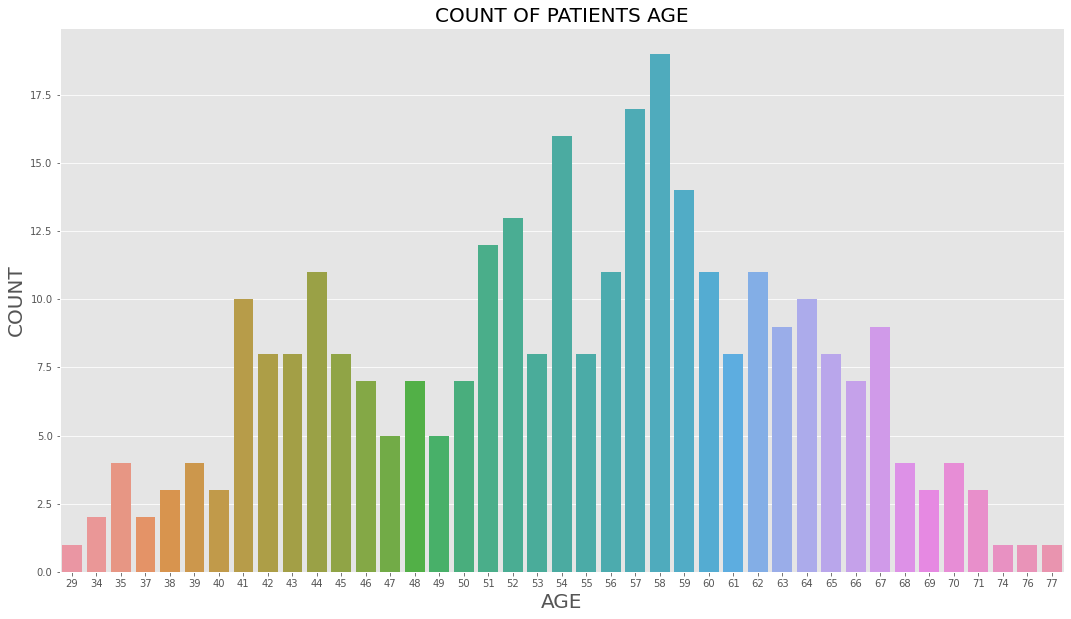

In [17]:
plt.figure(figsize=(18,10))
plt.style.use("ggplot")
sns.countplot(x=data["age"])    #using countplot
plt.title("COUNT OF PATIENTS AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

SO WE FIND THAT MOST OF THE PATIENTS HAVE AGE 58

In [18]:
s=data["sex"].value_counts().reset_index()
px.pie(s,names="index",values="sex")  #using pie here


So we find that around 207 are Male patients & 96 are Female patients:

In [19]:
s=data["output"].value_counts().reset_index()
px.pie(s,names="index",values="output")  #using pie here


68.7% has value 1 more chance of heart attack , 31.3% has value 0 less chance of heart attack

In [20]:
c=data["Chest Pain"].value_counts().reset_index()
c

,index,Chest Pain
0,0,143
1,2,87
2,1,50
3,3,23


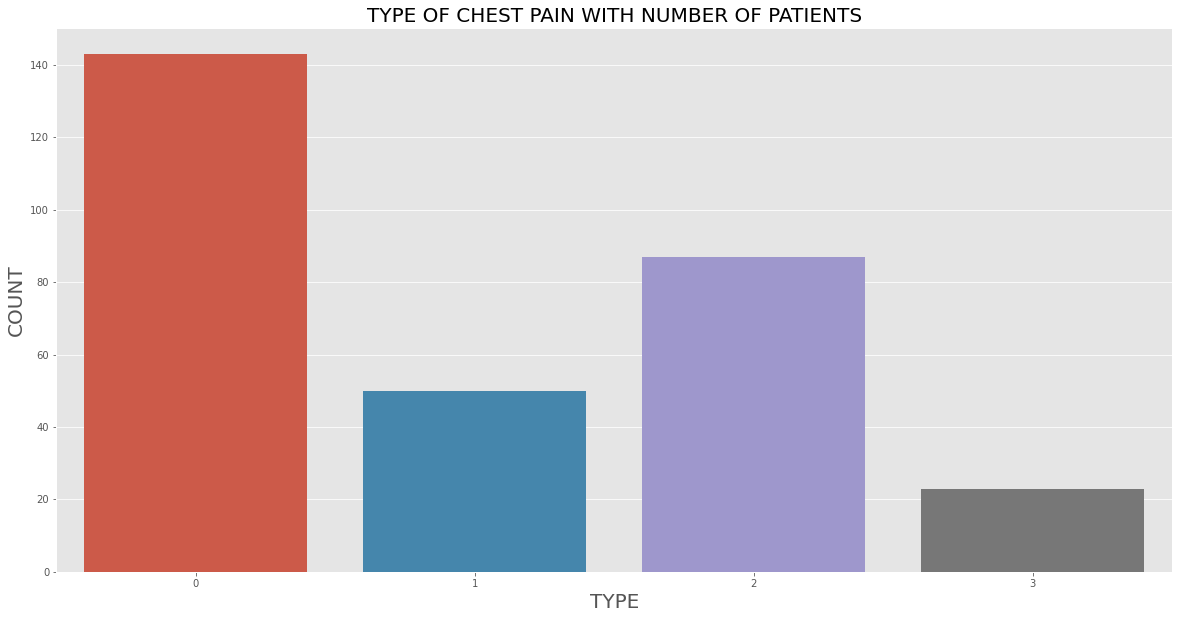

In [21]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.barplot(x=c["index"],y=c["Chest Pain"])   #using bar here for visualization
plt.title("TYPE OF CHEST PAIN WITH NUMBER OF PATIENTS",fontsize=20)
plt.xlabel("TYPE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

So we find that most of the patients have type Value 1 that is typical angina Value:

<Figure size 1440x720 with 0 Axes>

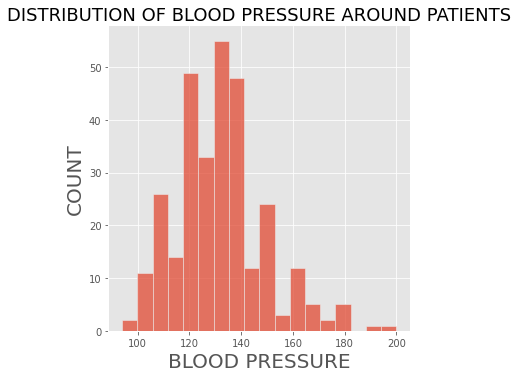

In [22]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(data["resting blood pressure"])   #using displot here
plt.title("DISTRIBUTION OF BLOOD PRESSURE AROUND PATIENTS",fontsize=18)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

High distibutation in blood pressure from 120 to 140

<Figure size 1440x720 with 0 Axes>

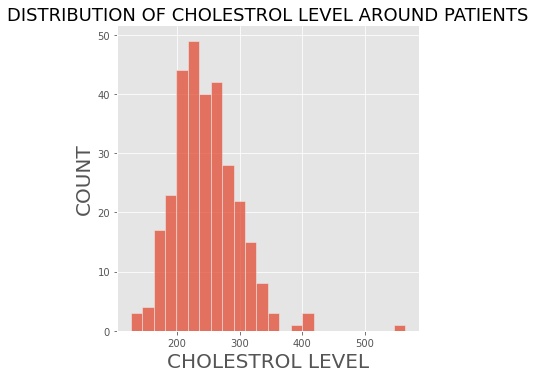

In [23]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(data["cholestoral"])
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL AROUND PATIENTS",fontsize=18)
plt.xlabel("CHOLESTROL LEVEL",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

<Figure size 1440x720 with 0 Axes>

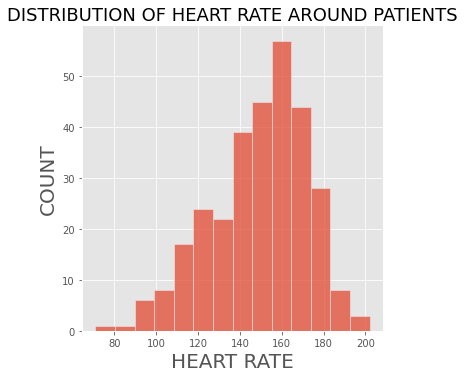

In [24]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(data["thalachh"])
plt.title("DISTRIBUTION OF HEART RATE AROUND PATIENTS",fontsize=18)
plt.xlabel("HEART RATE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

**Bivariate anlaysis**

# 1)AGE

In [25]:
d = pd.DataFrame (data[["age","output"]].value_counts().sort_values())
d

,,0
age,output,
29,1,1
38,0,1
39,0,1
77,0,1
40,1,1
...,...,...
59,0,9
41,1,9
57,0,10


pepole with age 54 more than heart attack

In [26]:
v=pd.crosstab(data["age"],data["output"]).reset_index()

v.columns=["age","low_risk","high_risk"]
v

,age,low_risk,high_risk
0,29,0,1
1,34,0,2
2,35,2,2
3,37,0,2
4,38,1,2
5,39,1,3
6,40,2,1
7,41,1,9
8,42,1,7
9,43,3,5


In [27]:
px.line(v,v["age"],v["high_risk"],title="Risk of high heart attack by using age")


In [28]:
px.line(v,v["age"],v["low_risk"],title="Risk of low heart attack by using age")

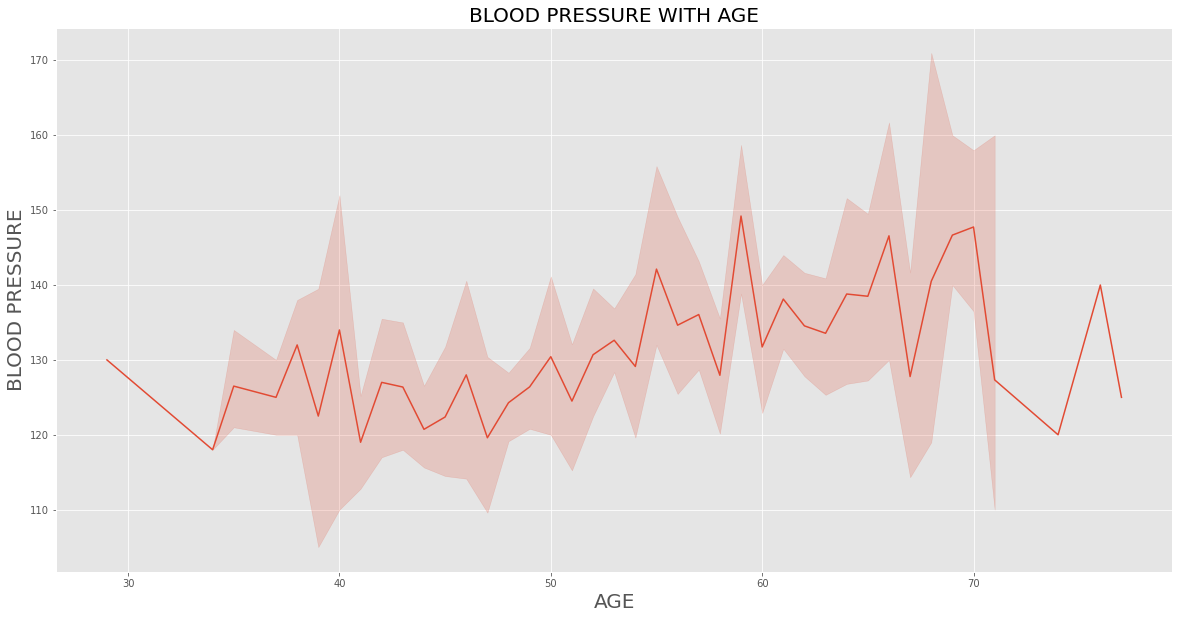

In [29]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.lineplot(y="resting blood pressure",x="age",data=data)
plt.title("BLOOD PRESSURE WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("BLOOD PRESSURE",fontsize=20)
plt.show()

SO WE FIND THAT THERE IS HIGH CHANCES OF INCREASE IN THE BLOOD PRESSURE WITH INCREASE IN THE AGE:

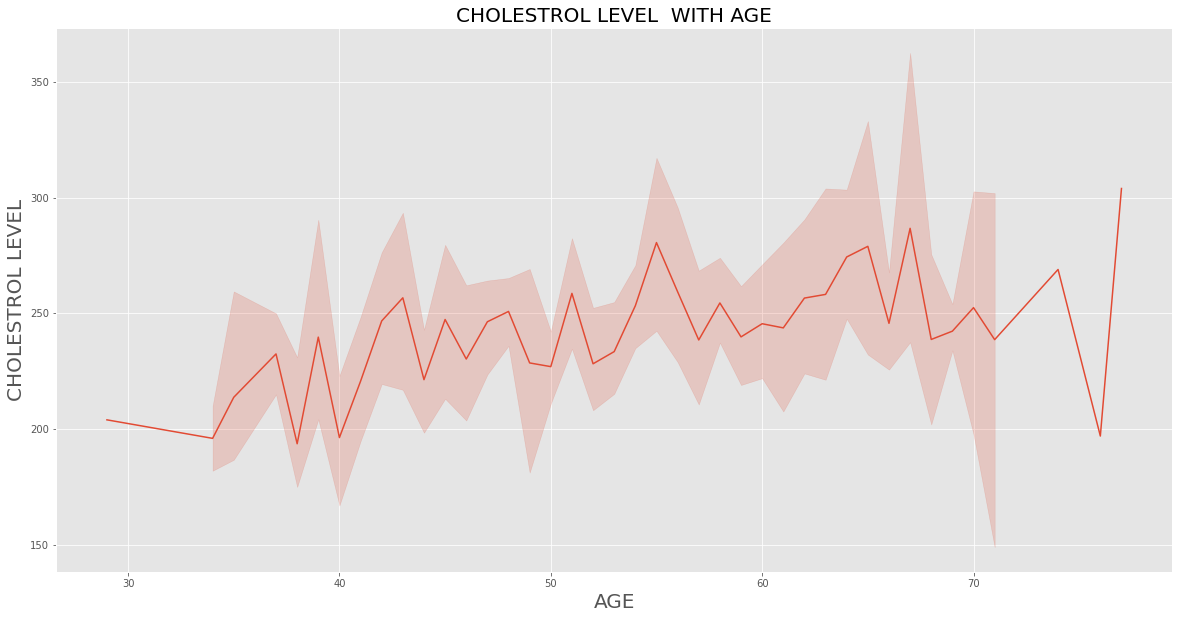

In [30]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.lineplot(y="cholestoral",x="age",data=data)
plt.title("CHOLESTROL LEVEL  WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("CHOLESTROL LEVEL",fontsize=20)
plt.show()

SO WE FIND THAT THERE IS HIGH CHANCES OF INCREASE IN CHOLESTROL LEVEL IN THE BODY WITH INCREASE IN THE AGE:

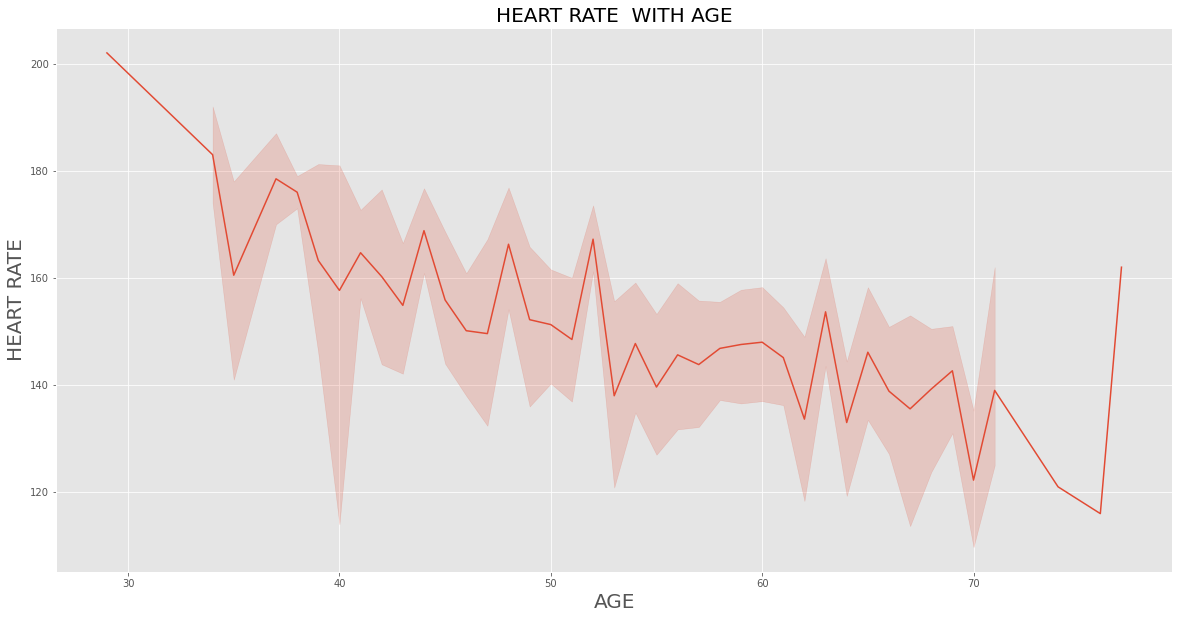

In [31]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.lineplot(y="thalachh",x="age",data=data)
plt.title("HEART RATE  WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("HEART RATE",fontsize=20)
plt.show()

AS WE CAN SEE WITH INCREASE IN THE AGE OF THE PATIENTS THE HEART RATE IS GETTING LOWER:

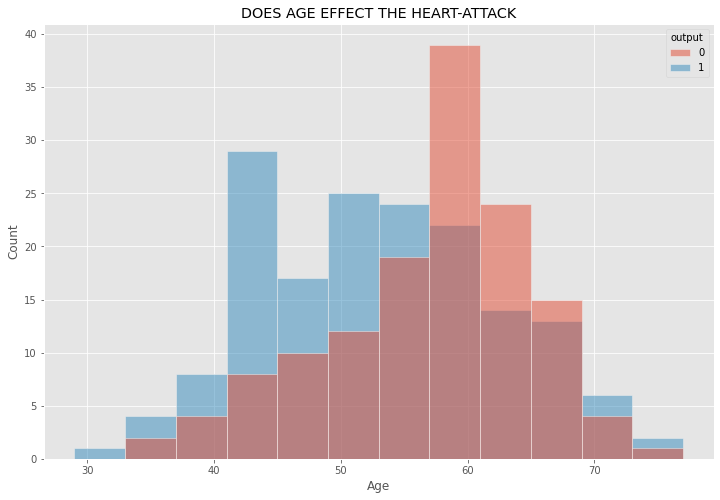

In [32]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.histplot(data = data, x = 'age', hue = 'output')
plt.title("DOES AGE EFFECT THE HEART-ATTACK")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

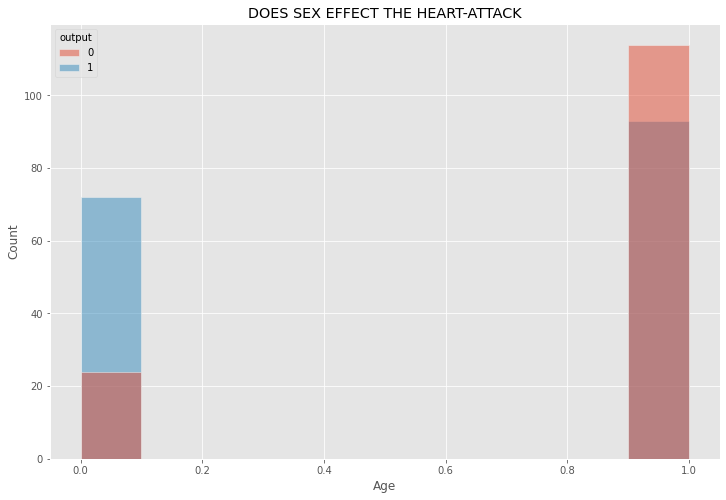

In [33]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.histplot(data = data, x = 'sex', hue = 'output')
plt.title("DOES SEX EFFECT THE HEART-ATTACK")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

0  Male . 1 Female

<AxesSubplot:>

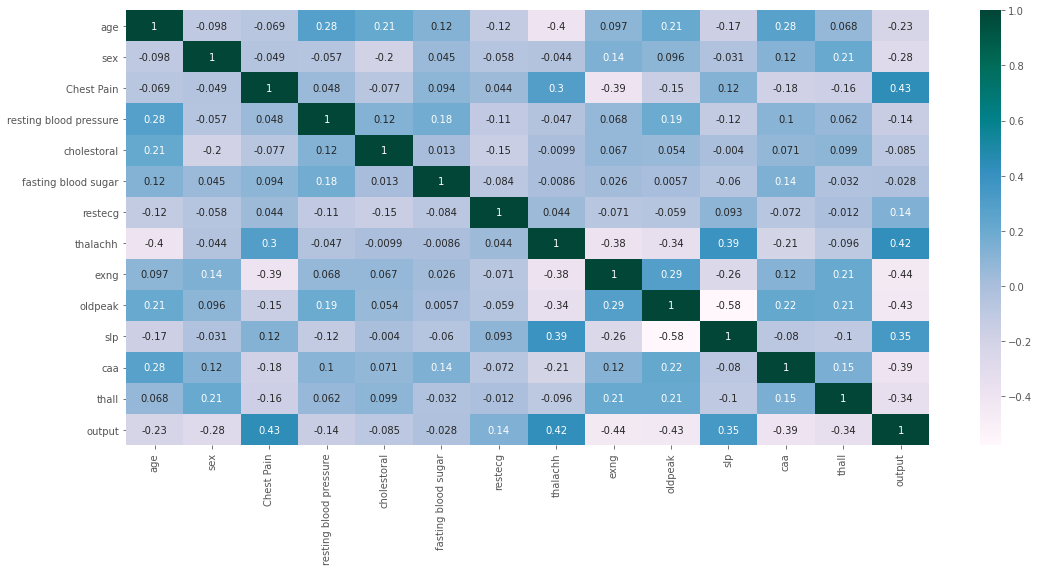

In [35]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True,cmap="PuBuGn")  #using heatmap here

**Modeling**

In [36]:
X = data.drop(['output'] , axis=1)
y = data['output']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  shuffle=True, random_state=42)

print('X_train.shape \n' , X_train.shape)
print('X_test.shape \n' , X_test.shape)
print('y_train.shape \n' ,y_train.shape)
print('y_test.shape \n' , y_test.shape)

X_train.shape 
 (203, 13)
X_test.shape 
 (100, 13)
y_train.shape 
 (203,)
y_test.shape 
 (100,)


In [38]:
# Import Libraries
from sklearn.linear_model import LogisticRegression

#----------------------------------------------------
#Applying LogisticRegression Model 


LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))


#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])


LogisticRegressionModel Train Score is :  0.6798029556650246
LogisticRegressionModel Test Score is :  0.78
Predicted Value for LogisticRegressionModel is :  [0 0 1 0 0 1 1 0 0 1]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [39]:
#Import Libraries
from sklearn.neighbors import KNeighborsClassifier
#----------------------------------------------------

#Applying KNeighborsClassifier Model 


KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(X_train, y_train)

#Calculating Details
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))

#Calculating Prediction
y_pred = KNNClassifierModel.predict(X_test)
print('Predicted Value for KNNClassifierModel is : ' , y_pred[:10])

KNNClassifierModel Train Score is :  0.7684729064039408
KNNClassifierModel Test Score is :  0.66
Predicted Value for KNNClassifierModel is :  [0 1 1 1 0 1 1 0 0 1]
